170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Sample labels shape: (50000, 1)


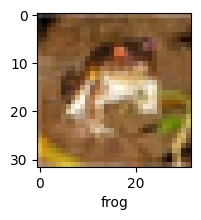

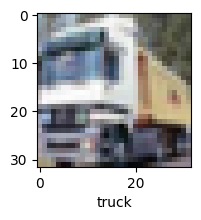

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training ANN model...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3077 - loss: 1.9259
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4204 - loss: 1.6439
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4529 - loss: 1.5555
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4769 - loss: 1.4836
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4936 - loss: 1.4385
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4852 - loss: 1.4538

ANN Test Accuracy: 0.482

Training CNN model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3906 - loss: 1.6698
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6013 - loss: 1.1290
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6545 - loss: 0.9835
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6941 - loss: 0.8810
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7188 - loss: 0.8093
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7426 - loss: 0.7447
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7616 - loss: 0.6920
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7747 - loss: 0.6413
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7893 - loss: 0.6043
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8027 - loss: 0.5709
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6998 - loss: 0.9332

CNN Test Accuracy: 0.698
313/313 ━━━━━━━━━

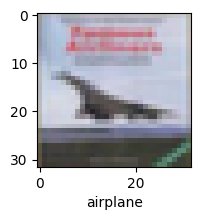

Actual Label: airplane
Predicted Label: airplane


In [1]:
# -------------------------------
# DL Experiment 3 - CIFAR-10 Image Classification using CNN
# -------------------------------

# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------------
# Load CIFAR-10 dataset
# -------------------------------
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Sample labels shape:", y_train.shape)

# Flatten label arrays (from 2D → 1D)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Define class names
classes = ["airplane", "automobile", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck"]

# -------------------------------
# Visualize some training images
# -------------------------------
def plot_sample(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

# -------------------------------
# Normalize pixel values (0–255 → 0–1)
# -------------------------------
X_train = X_train / 255.0
X_test = X_test / 255.0

# -------------------------------
# ANN model (for comparison)
# -------------------------------
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

print("\nTraining ANN model...")
ann.fit(X_train, y_train, epochs=5)

# Evaluate ANN performance
ann_loss, ann_acc = ann.evaluate(X_test, y_test)
print(f"\nANN Test Accuracy: {ann_acc:.3f}")

# -------------------------------
# Build CNN model
# -------------------------------
cnn = models.Sequential([
    # First convolution block
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second convolution block
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten + dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile CNN
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# -------------------------------
# Train CNN
# -------------------------------
print("\nTraining CNN model...")
cnn.fit(X_train, y_train, epochs=10)

# Evaluate CNN model
cnn_loss, cnn_acc = cnn.evaluate(X_test, y_test)
print(f"\nCNN Test Accuracy: {cnn_acc:.3f}")

# -------------------------------
# Predictions
# -------------------------------
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_classes, target_names=classes))

# -------------------------------
# Test visualization
# -------------------------------
i = 3
plot_sample(X_test, y_test, i)
print("Actual Label:", classes[y_test[i]])
print("Predicted Label:", classes[y_classes[i]])
